## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Installing Keras

Detailed installation instructions can be found at https://keras.io/#installation

Installation is a two step process:
1. Install a deep learning backend (Tensorflow recommended)

``` pip install tensorflow ```
2. Install Keras

``` pip install Keras ```


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

In [106]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

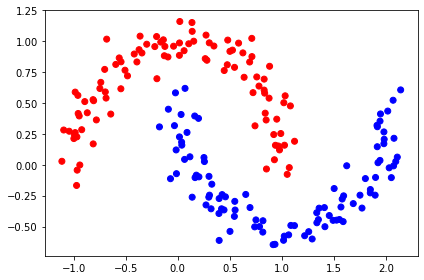

In [107]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [109]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer 

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [110]:
### YOUR CODE HERE ### (2 lines)
perceptron = Sequential()
perceptron.add(Dense(1, activation='relu'))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the error function as "binary_crossentropy". 

In [119]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

Q2. Now we train the built perceptron

In [120]:
### YOUR CODE HERE ### (1 line)
perceptron.fit(X_train, y_train)

5/5 [==============================] - 0s 776us/step - loss: 9.3267


In [121]:
def accuracy(y, y_preds):
    """
    Return accuracy, which is (TP+TN)/(TP+FP+FN+TN)
    """
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for x in range(len(y)):
        if y_preds[x] == 1:
            if y[x] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if y[x] == 1:
                FN += 1
            else:
                TN += 1
    TP = TP / len(y)
    FN = FN / len(y)
    TN = TN / len(y)
    FP = FP / len(y)
    
    return((TP+TN)/(TP+FP+FN+TN))

Text(12.25, 0.5, 'Test')

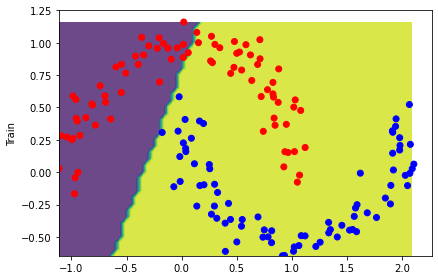

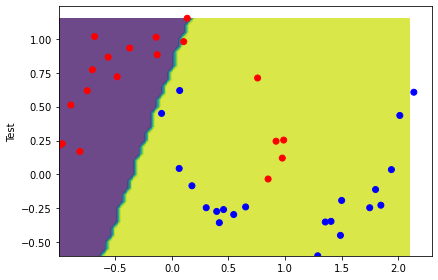

In [122]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For the second exercise, use Keras to create a 2 layer neural network by completing build_one_output_model(). Recall that our input is 2-D and output has 2 possible classes, so the neural network will have an input layer of 2. Hence, we will then add one hidden layer and an output layer of 1 (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
# We will go over specific activation functions throughout the class.
from keras.layers import Dense
# SGD is the learning algorithm we will use
from keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical, np_utils

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    # Add a input hidden layer with appropriate input dimension
    model.add(Dense(2, activation='relu', input_dim=2))

    # Add a final output layer with 1 unit 
    model.add(Dense(1, activation='sigmoid', input_dim=2))
    ######################

    sgd = SGD(lr=0.001, decay=1e-7, momentum=0.9)  #Stochastic gradient descent
    model.compile(loss="binary_crossentropy", optimizer=sgd)
    return model

In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train)

5/5 [==============================] - 0s 523us/step - loss: 0.6561


In [ ]:
# Print out accuracy
accuracy(model, X_test, y_test)

0.45

Text(12.25, 0.5, 'Test')

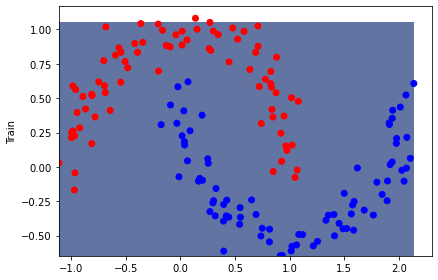

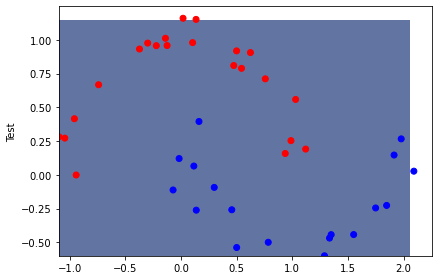

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is your number of outputs. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". It is easy to convert between labels (i.e. [1,2,3]) to their one-hot encoded counterparts:

In [ ]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Q1. Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

The optimizer and loss function have been filled in for you.

In [19]:
def build_classification_model():
    model = Sequential()

    # First add a fully-connected (Dense) hidden layer with appropriate input dimension
    model.add(Dense(2, activation='relu', input_dim=(2)))
    # Now our second hidden layer 
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    # Finally, add a readout layer
    model.add(Dense(2, activation='softmax'))
    ######################
    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    return model

In [20]:
model = build_classification_model()

In [21]:
print(X_train.shape)
print(y_train.shape)

(160, 2)
(160,)


Q2. Fit your model by training set

In [22]:
model.fit(X_train, y_train_vectorized)

5/5 [==============================] - 0s 762us/step - loss: 0.7362 - accuracy: 0.4875


In [24]:
# Print out accuracy
from utils import get_accuracy
get_accuracy(model, X_test, y_test)

0.55

Text(18.625, 0.5, 'Test')

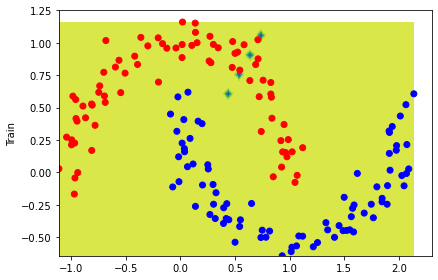

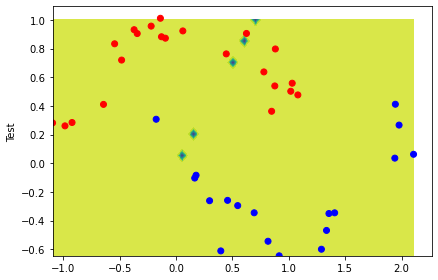

In [25]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Generally, the most important issue that comes from having too high of a learning rate in full-batch gradient descent is that it prevents the neural network from being able to optimally adjust its weights with respect to the loss gradient. When the learning rate is too high, the network will read the loss gradient and adjust its weights too far in the appropriate direction, "over-shooting" and missing the weights that would give the network a minimum loss. In all, this will lead to very long computation times, potentially leading gradient descent to fail to converge to a minimum, or even diverge. 

In contrast to how full-batch gradient descent updates weight parameters after calculating loss gradients for the whole training dataset, stochastic gradient descent makes weight parameter updates after calculating the gradient for each individual training sample, which is picked at random. Because of this, SGD behaves with much more variance. Therefore, a learning rate that is suitable for finding minima with full-batch gradient descent may be problematic with SGD, because particular samples with more extreme feature data may lead the network to either greatly overshoot or undershoot the minimum.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Recent research indicates that neural augmentation with "content loss" is an augmentation method that helps the classification of dogs and cats, but does not improve classification of handwritten digits. In this method, two images of the same class (e.g. 2 images of different dogs) are chosen randomly, and an augumentation net maps them into a convolutional neural network, which outputs a new image with properties of both images. This image is fed into a classification model, and the error from this classification is backpropogated into the augmentation net, which uses the error to learn how different images from the same class can differ in content, as well as how to weigh these content differences during classification. It makes sense that this would not be as helpful for digit recognition, because there are larger differences in content between pictures of dogs or cats and between handwritten digits. Differences between digits may be so small that such an augmentation process could make no improvements to classification, or worse, it may cause a neural net to overfit to extraneous handwriting differences, making digit classification less accurate.

Source: https://link.springer.com/article/10.1186/s40537-019-0197-0?code=94a90a50-503a-449c-b375-d37b4cd1d5af

Q3. Suppose we have the following two neural networks containing fully-connected layers only. 
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A

An advantage of network A over B is that network A preserves the number of features (units) in the input layer in the output layer, without convolving them into a smaller amount of units within hidden layers, so if all 100 input features are important to the final classification/prediction, less information is lost with network A. In contrast, network B's hidden layer allows the network to make more complex representations of the information from the input layer, which may provide more nuanced information than network A for making a final classification/prediction.

# Exercise 5:

Now let's revisit the classification problem in Homework2. 

income.csv contains the features. It has 3706 records. First 2800 observations are used for training dataset, the remaining observations are used for validation dataset.

income_Xtest.csv contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
Apply standardization to continuous values<br/> 
Convert categorical variables into one-hot encodings(including the output variable consisting of ">50" or "<=50"). Note that in neural network, we don't need to drop one category. <br/>
Split data into train and validation set<br/>

In [129]:
import pandas as pd

# Load your training data set and test data
income_tr = pd.read_csv("income.csv")
income_te = pd.read_csv("income_Xtest.csv")

# Clean the dataset: remove the rows with " ?"
income_tr = income_tr.replace(' ?',np.nan).dropna(axis=0, how='any')
income_te = income_te.replace(' ?',np.nan).dropna(axis=0, how='any')
X_test = income_te

# Split data into X and y
X = income_tr.loc[:, income_tr.columns != 'income']
y = income_tr.loc[:, 'income']

#Apply standardization to continuous values and one-hot encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cont_feats = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_feats = [feat for feat in X.columns if feat not in cont_feats]

scaler = StandardScaler()
scaler.fit(X[cont_feats])

# Standardize continuous features in training data
standardized_X_tr = pd.DataFrame(scaler.transform(X[cont_feats]))

# Standardize continuous features in testing data with same fit for consistency
standardized_X_te = pd.DataFrame(scaler.transform(X_test[cont_feats]))

enc = OneHotEncoder(sparse=False, drop='first')
enc.fit(X[cat_feats])

# One-hot Encode categorical features in training data
encoded_X_tr = pd.DataFrame(enc.transform(X[cat_feats]), columns = enc.get_feature_names(cat_feats))

# One-hot Encode categorical features in testing data with same fit for consistency
encoded_X_te = pd.DataFrame(enc.transform(X_test[cat_feats]), columns = enc.get_feature_names(cat_feats))
                             
# Reconstruct X and X_test DataFrames
X = standardized_X_tr.join(encoded_X_tr)
X_test = standardized_X_te.join(encoded_X_te)

# Confirm by shapes that training and testing datasets are correctly reconstructed 
print(standardized_X_tr.shape)
print(encoded_X_tr.shape)
print(X.shape)
X.head()

print(standardized_X_te.shape)
print(encoded_X_te.shape)
print(X_test.shape)

######################
# Split data into training and validation set
X_train = X.iloc[:2800,:]
y_train = y.iloc[:2800,]
X_val = X.iloc[2800:,:]
y_val = y.iloc[2800:,]

(3411, 6)
(3411, 88)
(3411, 94)
(926, 6)
(926, 88)
(926, 94)


In [130]:
# Print out the shape of X_train
X_train.shape

(2800, 94)

Q2. Build a neural network to predict the output in the income dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please build your model in the build_final_model() function

In [131]:
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    model.add(Dense(102, activation='tanh'))
    model.add(Dense(102, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(102, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    ######################
    sgd = SGD(lr=0.15, decay=1e-8, momentum=.5)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    return model

In [132]:
model = build_final_model()

Q3. Fit the model by training set

In [133]:
from keras.utils import to_categorical, np_utils
cats = y_train.unique()
di = dict(zip(cats, np.arange(len(cats))))
y_train_enc = np_utils.to_categorical(y_train.map(di))

cats_val = y_val.unique()
di_val = dict(zip(cats_val, np.arange(len(cats_val))))
y_val_enc = np_utils.to_categorical(y_val.map(di_val))

# Print label shapes to verify correct construction
print(y_train.shape)
print(y_train_enc.shape)
print(y_val.shape)
print(y_val_enc.shape)

(2800,)
(2800, 2)
(611,)
(611, 2)


In [134]:
model.fit(X_train, y_train_enc)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

88/88 [==============================] - 0s 920us/step - loss: 0.1661 - accuracy: 0.9468


Q4. Obtain predictions on validation set and print accuracy,precision,recall 

##### (Gridsearch for best neural net parameters hidden below)

In [73]:
def build_model_gs(learn_rate=0.01, decay_rate=1e-9, momentum_rate=0.1, activation1='relu', activation2='relu', activation3='relu'):
    model_gs = Sequential()
    ### YOUR CODE HERE ###
    model_gs.add(Dense(102, activation=activation1))
    model_gs.add(Dense(102, activation=activation2))
    model_gs.add(Dropout(0.2))
    model_gs.add(Dense(102, activation=activation3))
    model_gs.add(Dense(2, activation='softmax'))
    ######################
    sgd = SGD(lr=learn_rate, decay=decay_rate, momentum=momentum_rate)  # Stochastic gradient descent
    model_gs.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model_gs

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

seed=42
np.random.seed(seed)
model_gs = KerasClassifier(build_fn=build_model_gs)

param_grid = {
    'learn_rate': [0.01, .1, .15, .17],
    'decay_rate': [1e-9,1e-8,1e-7],
    'momentum_rate': [0.5, 0.9, 1.3],
    'activation1': ['relu','tanh','sigmoid','linear'],
    'activation2': ['relu','tanh','sigmoid','linear'],
    'activation3': ['relu','tanh','sigmoid','linear'],
}

grid_search = GridSearchCV(estimator = model_gs, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) 

In [550]:
# Fit the training data
grid_result = grid_search.fit(X_train, y_train_enc)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6912 out of 6912 | elapsed: 13.0min finished


88/88 [==============================] - 0s 1ms/step - loss: 0.1682 - accuracy: 0.9436


In [551]:
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
'''for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

Best score: 0.952858 using {'activation1': 'tanh', 'activation2': 'tanh', 'activation3': 'relu', 'decay_rate': 1e-08, 'learn_rate': 0.15, 'momentum_rate': 0.5}


'for mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

In [135]:
rounded_predictions = model.predict_classes(X_val)
rounded_val_labels = np.argmax(y_val_enc, axis=1)

# Visually compare predictions and labels for tuning purposes
print(rounded_predictions,"\n")
print(rounded_val_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 

In [136]:
from utils import get_accuracy
get_accuracy(model, X_val, rounded_val_labels)

0.7708674304418985

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#obtain predictions on validation set 
predictions = model.predict(X_val)

# Print accuracy,precision,recall 
print("Neural Net Accuracy: ", accuracy_score(rounded_val_labels, rounded_predictions))
print("Neural Net Precision: ", precision_score(rounded_val_labels, rounded_predictions))
print("Neural Net Recall: ", recall_score(rounded_val_labels, rounded_predictions))

Neural Net Accuracy:  0.7708674304418985
Neural Net Precision:  0.8653846153846154
Neural Net Recall:  0.25280898876404495


Q5. Plot the ROC curve by giving appropriate names for title and axes. 

0.6183213535044244


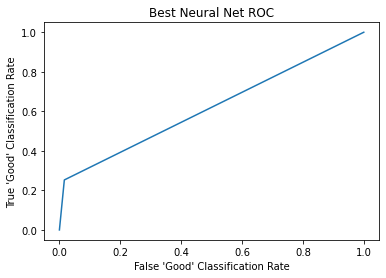

In [138]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_val_pred_proba = model.predict(X_val)[:,1]

fpr, tpr, _ = roc_curve(rounded_val_labels, rounded_predictions)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.xlabel("False 'Good' Classification Rate")
plt.ylabel("True 'Good' Classification Rate")
plt.title("Best Neural Net ROC")


roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

#### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same dataset to produce Logistic Regression and Random Forest models. Note: when you transfrom the target as a single binary vector, please make sure >50 is 1, <=50 is 0

Q6. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You can apply any method that we learned before to find the best parameters

In [139]:
from keras.utils import to_categorical, np_utils

di = {" <=50K": 0, " >50K": 1}
y_train_binary = y_train.map(di)
print(y_train_binary.shape)
print(y_train_binary)
y_val_binary = y_val.map(di)

(2800,)
0       0
1       0
2       0
3       1
4       0
       ..
3040    0
3041    0
3043    0
3044    1
3045    0
Name: income, Length: 2800, dtype: int64


In [140]:
def logistic_regression_model(X_train, y_train):

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    
    combos = [(0.1, 'l1', 'saga'),(0.1, 'l1', 'liblinear'),(0.5, 'l1', 'saga'),(0.5, 'l1', 'liblinear'),\
             (0.1, 'l2', 'saga'), (0.5, 'l2', 'saga'),(0.1, 'l2', 'lbfgs'),(0.5, 'l2', 'lbfgs'),(0.1, 'l2', 'liblinear'),(0.5, 'l2', 'liblinear')]
    
    scores = []
    
    for combo in range(len(combos)):
        logist = LogisticRegression(C=combos[combo][0], penalty=combos[combo][1], solver=combos[combo][2],  max_iter=100000)
        logist.fit(X_train, y_train)
        scores.append(accuracy_score(y_val_binary, logist.predict(X_val)))
        
    best_combo = scores.index(max(scores))
    best_logist = LogisticRegression(C=combos[best_combo][0], penalty=combos[best_combo][1], solver=combos[best_combo][2])
   
    ######################
    return best_logist

Q7. Fit the model by training set, obtain predictions on validation set and compute accuracy,precision,recall

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
#fit the model
best_logist = logistic_regression_model(X_train, y_train_binary)
#obtain predictions on validation set and compute accuracy,precision,recall

best_logist.fit(X_train, y_train_binary)
y_pred_val = best_logist.predict(X_val)

print("Logistic Regression Accuracy: ", accuracy_score(y_val_binary, y_pred_val))
print("Logistic Regression Precision: ", precision_score(y_val_binary, y_pred_val))
print("Logistic Regression Recall: ", recall_score(y_val_binary, y_pred_val))

Logistic Regression Accuracy:  0.762684124386252
Logistic Regression Precision:  0.8666666666666667
Logistic Regression Recall:  0.21910112359550563


/Users/johnwarlick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Q8. Plot the ROC curve by giving appropriate names for title and axes. 

0.60262215533124


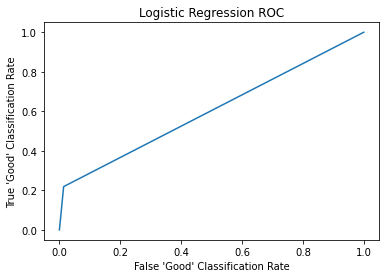

In [142]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_val_pred = best_logist.predict(X_val)
fpr, tpr, _ = roc_curve(y_val_binary, y_val_pred)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.xlabel("False 'Good' Classification Rate")
plt.ylabel("True 'Good' Classification Rate")
plt.title("Logistic Regression ROC")

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

Q9. Implement a function random_forest_model that returns a random forest model with the best paprameters. You can apply any method that we learned before to find the best parameters. (Please set the random state to be 26)

In [ ]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state=26)# Please set the random state to be 26
    
    from sklearn.model_selection import GridSearchCV
    param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'max_features': [3,7,10,25,70,102],
    'min_samples_leaf': [.005,.01,.05,.1,.15,.2],
    'min_samples_split': [.01,.05,.1,.15,.2],
    'n_estimators': [4, 8, 16, 32, 64, 100, 150] 
    }
    
    grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) 
     
    grid_search.fit(X_train, y_train)
    
    best_hyperparams = grid_search.best_params_
    print('Best hyperparameters:\n', best_hyperparams)
    
    rf_best = RandomForestClassifier(random_state=26, max_depth=best_hyperparams['max_depth'],max_features=best_hyperparams['max_features'],\
                                    min_samples_leaf=best_hyperparams['min_samples_leaf'],min_samples_split=best_hyperparams['min_samples_split'],\
                                    n_estimators=best_hyperparams['n_estimators'])

    ######################
    return rf_best

In [ ]:
rf = random_forest_model(X_train, y_train_binary)

Fitting 3 folds for each of 7560 candidates, totalling 22680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

Best hyperparameters:
 {'max_depth': 8, 'max_features': 70, 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 4}


**(Gridsearch for best Random Forest parameters hidden above)**

Q10. Fit the model by training set, obtain predictions on validation set and compute accuracy,precision,recall

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Fit the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the validation set and display accuracy, precision and recall. 
y_pred_val = rf.predict(X_val)
print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(f"Random forest Precision: {precision_score(y_val, y_pred_val, pos_label=' >50K')}")
print(f"Random forest Recall: {recall_score(y_val, y_pred_val, pos_label=' >50K')}")

Random Forest Accuracy: 0.7774140752864157
Random forest Precision: 0.9772727272727273
Random forest Recall: 0.24157303370786518


Q11. Plot the ROC curve by giving appropriate names for title and axes.

AUC value is 0.8661805537535355


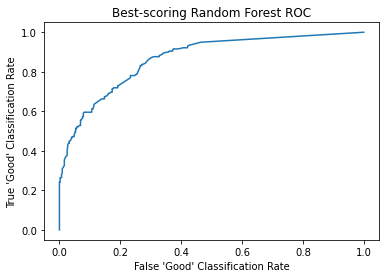

In [147]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_val_pred_proba = rf.predict_proba(X_val)[:,1]

fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba, pos_label=rf.classes_[1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.xlabel("False 'Good' Classification Rate")
plt.ylabel("True 'Good' Classification Rate")
plt.title("Best-scoring Random Forest ROC")

roc_auc = metrics.auc(fpr, tpr)
print(f'AUC value is {roc_auc}')

Q12: Which of the above 3 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

It appears that the best-working model out of the 3 tested for this data was the RandomForest. The neural network's performance on this task was not particularly compelling: despite having large accuracy and recall metrics, the comparatively small AUC value indicates that the model has issues reliably ranking positive-class observations above negative-class observations. The same notion appears to be true for our LogisticRegression model, except that its precision is very high and its recall is very low. Our RandomForest model has comparable accuracy and precision metrics to our LogisticRegression model, but its AUC is much higher, showing that it has a much better ability to differentiate between classes than the other two models. Moreover, because our data set is imbalanced, the Random Forest's superior precision metric and competent recall metric in comparison to the other models make it a good choice.

Using the best of the above 3 models, obtain predictions for the test set.

In [81]:
rf_final = RandomForestClassifier(max_depth=8, max_features=70, min_samples_leaf=0.005, min_samples_split=0.01, n_estimators=4)
rf_final.fit(X, y)
y_pred = rf_final.predict(X_test)

# Exercise 6

### Convolution Neural Netwrok

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

Usually, in CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. 

The dataset which we will use in this part is the MNIST digits classification dataset. This is a dataset of 60,000 28x28 images of the 10 digits, along with a test set of 10,000 images.

In [96]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

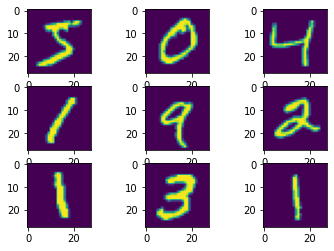

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

Q1. To process images in neural network, we have to indicate how may channels (depth) we are going to use. For instance, a coloful image from a standard digital camera will have a red, green and blue channel (RGB), so it has 3 channels (i.e. depth=3) in total, whereas a grayscale image only has 1 channel (depth=1).

Please reshape MNIST to indicate each image only contains 1 channel (depth=1). 

In [97]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

The pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

Q2. Normalize the pixel values of grayscale images, e.g. rescale them to the range [0, 1]. 

In [98]:
x_train = x_train * (1/255)
x_test = x_test * (1/255)

Q3. You also need to encode the target values into binary values (one-hot encoding)

In [99]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(y_train.reshape(-1,1))
y_test = enc.fit_transform(y_test.reshape(-1,1))

Q4. Implement build_cnn_model() that returns a CNN model that takes an input of image, passes it to:
- A convolution layer with kernel size 5x5
- A MaxPool layer of size 2x2
- Another convolution layer with kernel size 5x5
- Another MaxPool layer of size 2x2
- Flatten it
- Add one fully-connected layer
- Finally, output your classification by another fully-connected layer

The number of units/fitlers in each convolution/full-connected layer is determined by yourself. Remember that your goal is to minimize the entropy loss.

As before, use the "relu" activation function for all the convolution/full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [100]:
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten

def build_cnn_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(32, kernel_size=5, activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_cnn_model()

Q5. Fit your CNN model by x_train, y_train

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0699 - accuracy: 0.9787
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0238 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0182 - accuracy: 0.9941


Q6. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
test_cceloss = model.evaluate(x_test, y_test)
print(test_cceloss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0376 - accuracy: 0.9885
[0.03755062073469162, 0.9884999990463257]


Q7. Now let's check the performance of multi-layer perceptrons (MLP) in image classfication. Implement build_mlp_model() that returns a MLP model that takes an input of image, passes it to 1 fallen layer and 3 full-connected layers

The number of units in each full-connected layer is determined by yourself. Remember that your goal is to minimize the entropy loss.

As before, use the "relu" activation function for the first 2 full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)
x_train_flat[0].shape

(784,)

In [101]:
def build_mlp_model():
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(350, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model2 = build_mlp_model()

Q8. Fit your MLP model by x_train, y_train. (Please use the same parameters with those in CNN model for comparison)

In [102]:
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2027 - accuracy: 0.9396
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0567 - accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0425 - accuracy: 0.9860
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9887


Q9. Evaluate your model on test set and print out the entropy loss and the accuracy

In [103]:
test_cceloss2 = model2.evaluate(x_test, y_test)
print(test_cceloss2)

313/313 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9784
[0.07344476133584976, 0.9783999919891357]


Q10. Which of the above 2 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

The accuracy and loss metrics of the convolutional neural network indicate that it performed better here than the multi-layer perceptron. This makes sense, because the CNN is both a more complex model and more suited to this image classification task. The CNN processes each image as a 2-dimensional input while the MLP takes each image as a flattened vector, which lets the CNN inherently account for more spatial information with less stringency than the MLP model. Particularly, the convolution and pooling layers allow the CNN model to locate and track 2-dimensional patterns independently of their locations in the image, whereas the MLP is likely to assume certain pixels should always contain certain parts of a pattern. Also, because the MLP's layers are fully-connected, it is more prone to overfitting than the CNN. Although this image classification task is simple and both models performed well, the aforementioned reasons are likely why the CNN model performed better than the MLP model.

# Exercise 7
### Autoencoder

So far, we have learned a lot about how to use neural networks in supervised learning, but in fact there are also many applications of neural networks in unsupervised learning. One of the examples is autoencoder.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In this part, we will continue using MNIST dataset.

Q1. Implement an autoencoder model that takes an input of 28x28x1 images, compress them into (4,) vectors by an econder, and then decompress them back to 28x28 images by a decoder. In other words, the orginal dimensionality is 784 (=28x28), but we want to compress them into the dimensionality of 4 by an encoder, then reconstruct these (4,) vectors back to 28x28 images by an decoder

You only need to define an encoder and a decoder by adding several layers. In your encoder, you are required to inlude a flatten layer and several fully-connected layers, while in your decoder, you are required to use fully-connected layers and one reshape layer. Do not use other types of layers.

You need to determine the number of fully-connected layers, number of units, and activation functions by yourself. Remember your goal is to minimize validation loss of you reconstructed the images.

The optimizer and loss function have been filled in for you.

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.layers import Reshape, Input

# encoder layers
encoding_dim = 4
encoded = Sequential()
encoded.add(Flatten())
encoded.add(Dense(784/encoding_dim, activation='relu'))
encoded.add(Dense(784/encoding_dim, activation='relu'))
encoded.add(Dense(784/encoding_dim, activation='relu'))
encoded.add(Dense(98, activation='relu'))
encoded.add(Dense(49, activation='relu'))
encoded.add(Dense(4, activation='relu'))
######################

# decoder layers
decoded = Sequential()
decoded.add(Dense(784/encoding_dim, activation='relu'))
decoded.add(Dense(392, activation='relu'))
decoded.add(Dense(588, activation='relu'))
decoded.add(Dense(784, activation='sigmoid'))
decoded.add(Reshape((28,28)))
######################

input_x = Input(shape=(28, 28, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

Q2. Fit your model by x_train only

In [ ]:
autoencoder.fit(x_train, x_train, epochs=5, batch_size=150, validation_split=0.25)

Epoch 1/5
300/300 [==============================] - 3s 11ms/step - loss: 0.0668 - val_loss: 0.0464
Epoch 2/5
300/300 [==============================] - 3s 11ms/step - loss: 0.0392 - val_loss: 0.0357
Epoch 3/5
300/300 [==============================] - 3s 11ms/step - loss: 0.0342 - val_loss: 0.0332
Epoch 4/5
300/300 [==============================] - 3s 11ms/step - loss: 0.0321 - val_loss: 0.0317
Epoch 5/5
300/300 [==============================] - 3s 11ms/step - loss: 0.0309 - val_loss: 0.0307


Q3. Test your autoencoder on test set, print out the MSE and output images as numpy arrays

In [ ]:
# Test your autoencoder on test set, print out the MSE
y_pred_autoenc = autoencoder.evaluate(x_test, x_test)
print(y_pred_autoenc)
######################
# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

313/313 [==============================] - 1s 2ms/step - loss: 0.0306
0.030574779957532883


Plot your encoded image

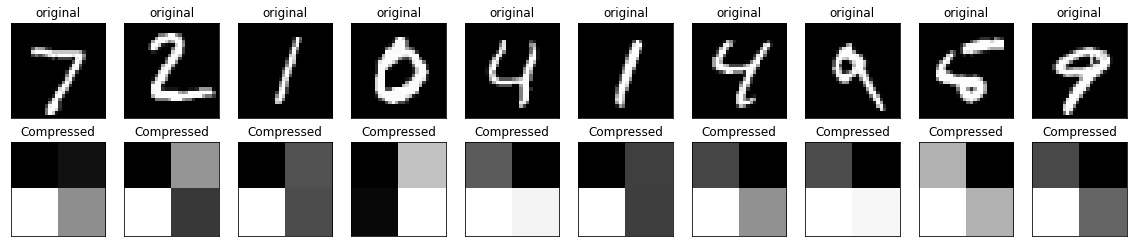

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_flat[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Plot your decoded image

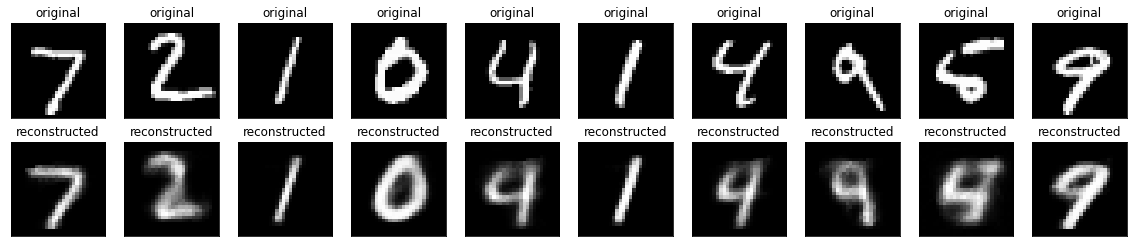

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_flat[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Exercise 8
### Denoising Autoencoder

Except fully-connected layers, an autoencoder can also consist of other types of layers such as CNN or RNN. Here, we will see an example with convolution layers.

Denoising autoencoders are an extension of the basic autoencoder, and represent a stochastic version of it. Denoising autoencoders attempt to address identity-function risk by randomly corrupting input (i.e. introducing noise) that the autoencoder must then reconstruct, or denoise.

Again, we will continue using MNIST dataset.

In [16]:
# Add some white noise into the original MNIST images
import numpy as np

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Plot the noised images

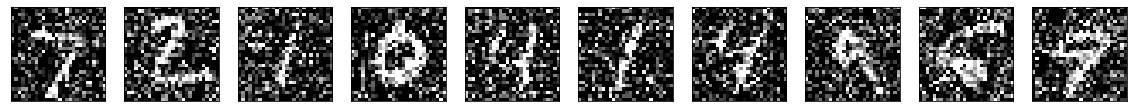

In [17]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Q1. Implement an CNN autoencoder model consisting of an encoder and a decoder. 

The encoder takes an input of image, passes it to 
- A convolution layer
- A MaxPool layer
- Another convolution layer 
- Another MaxPool layer

The decoder takes the output of the encoder as the input, passes it to 
- A convolution layer
- An UpSampling layer
- Another convolution layer
- Another UpSampling layer
- Another convolution layer

As in exercise 6, the number of fitlers in each convolution layer is determined by yourself. In addition, you are also required to determine the kernel/pool/upsampling size of each layer. Remember that your goal is to minimize the entropy loss.<br/>
Use the SAME padding for all the convolution and max pooling layers.<br/>
Use the "relu" activation function for all the hidden layers, but use the "sigmoid" activation for the final convolution layer.


(An upsampling layer is a simple layer with no weights that will enlarge the dimensions of input )

The optimizer and loss function have been filled in for you.

In [18]:
from keras.layers import UpSampling2D
# encoder layers
encoded2 = Sequential()
encoded2.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='SAME', input_shape=(28,28,1)))
encoded2.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
encoded2.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='SAME'))
encoded2.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
######################

# decoder layers
decoded2 = Sequential()
decoded2.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='SAME'))
decoded2.add(UpSampling2D((2,2)))
decoded2.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='SAME'))
decoded2.add(UpSampling2D((2,2)))
decoded2.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='SAME'))
######################

img_x=28
img_y=28

input_x = Input(shape=(img_x, img_y, 1))
code = encoded2(input_x)
output = decoded2(code)

autoencoder2 = Model(input_x,output)

autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy')

Q2. Fit your model by x_train_noisy and x_train

In [19]:
autoencoder2.fit(x_train_noisy, x_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 18s 46ms/step - loss: 0.6845 - val_loss: 0.6465
Epoch 2/100
375/375 [==============================] - 17s 45ms/step - loss: 0.6233 - val_loss: 0.5381
Epoch 3/100
375/375 [==============================] - 17s 45ms/step - loss: 0.5230 - val_loss: 0.4992
Epoch 4/100
375/375 [==============================] - 17s 45ms/step - loss: 0.4986 - val_loss: 0.4896
Epoch 5/100
375/375 [==============================] - 17s 45ms/step - loss: 0.4896 - val_loss: 0.4806
Epoch 6/100
375/375 [==============================] - 17s 45ms/step - loss: 0.4805 - val_loss: 0.4714
Epoch 7/100
375/375 [==============================] - 17s 45ms/step - loss: 0.4708 - val_loss: 0.4617
Epoch 8/100
375/375 [==============================] - 17s 45ms/step - loss: 0.4614 - val_loss: 0.4510
Epoch 9/100
375/375 [==============================] - 17s 45ms/step - loss: 0.4507 - val_loss: 0.4391
Epoch 10/100
375/375 [==============================] - 17s 45ms/step - l

Q3. Evaluate your model on test set and print out the entropy loss

In [20]:
y_pred_denoised = autoencoder2.evaluate(x_test_noisy, x_test)
print(y_pred_denoised)

313/313 [==============================] - 2s 6ms/step - loss: 0.1346
0.13456392288208008


Plot your noised images and their corresponding reconstructed images

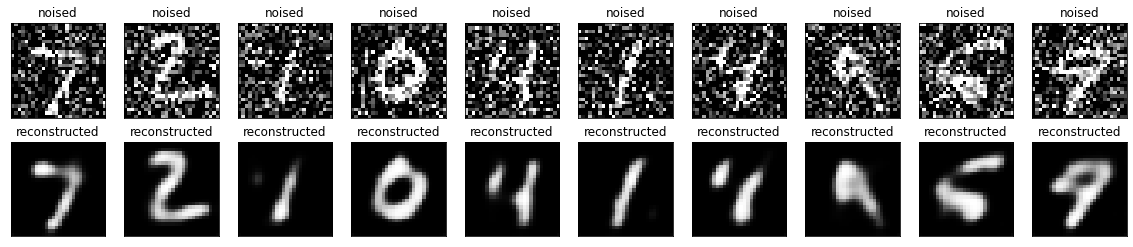

In [21]:
decoded_imgs = autoencoder2.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("noised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()